## Preparation

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import bar_chart_race as bcr
from scipy import stats

os.chdir('../')
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="pastel")

In [7]:
df = pd.read_csv('./data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [9]:
df['monthwise'] =  pd.to_datetime(df.date).apply(lambda x:str(x.year)+'/'+str(x.month))

### World's total cases and new cases

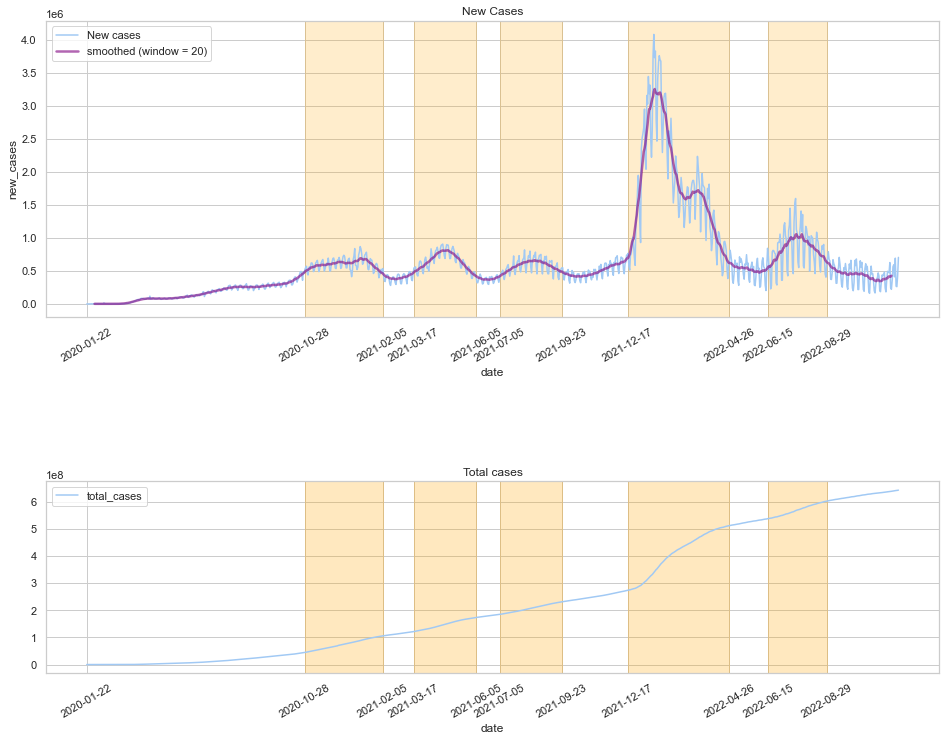

In [10]:
# total cases

periods = [[280,380],[420,500],[530,610],[695,825],[875,950]]
date_list = df[['date','total_cases']].groupby('date').count().index
dl_offset = 21 #offset for date xticks in new_cases

date_for_newcase = [0]
for period in periods:
    date_for_newcase.extend(period)


plt.figure(figsize = (16,12))
ax1 = plt.subplot(3,1,3)
df_total_case= df[df.location == 'World'][['date','total_cases']].set_index('date')
sns.lineplot(df_total_case)
plt.title("Total cases")
plt.xticks(date_for_newcase, rotation =30)
for period in periods:
    plt.axvspan(period[0],period[1],color = 'orange',alpha = 0.25)

# new cases
ax2 = plt.subplot(2,1,1)
df_new_cases = df[df.location == 'World'][['date','new_cases']].set_index('date').new_cases

sns.lineplot(
    df_new_cases,
    linewidth = 1.5,
    label = "New cases")

sns.lineplot(df_new_cases.rolling(window = 20,center = True).mean(),
             alpha = 0.6,
             linewidth=2.5,
             color = 'purple',
             label = 'smoothed (window = 20)')


for period in periods:
    plt.axvspan(period[0],period[1],color = 'orange',alpha = 0.2)

plt.title("New Cases")
plt.xticks(date_for_newcase, rotation = 30)

plt.show()

As the figures above show, there are 5 spike during these 3 years:

* 2020.10.28 -- 2021.02.05
* 2021.03.17 -- 2021.06.05
* 2021.07.05 -- 2021.09.23
* 2021.12.17 -- 2022.04.26
* 2022.06.15 -- 2022.08.29

The peak value for each spike are:

The peak for spike 1 is 869883
The peak for spike 2 is 907690
The peak for spike 3 is 819378
The peak for spike 4 is 4083949
The peak for spike 5 is 1598535


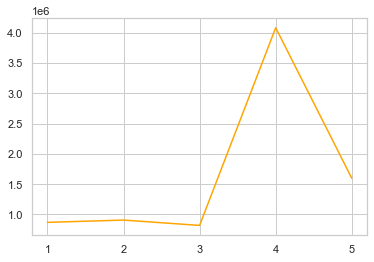

In [11]:
i = 1
peak = []
for period in periods:
    MAX = df_new_cases.iloc[period[0]:period[1]].max()
    peak.append(MAX)
    print("The peak for spike {} is {}".format(i,int(MAX)))
    i += 1

sns.lineplot(x = [1,2,3,4,5], y = peak,color = 'orange')
plt.xticks([1,2,3,4,5])
plt.show()

### Continents' total cases, new cases and ratio

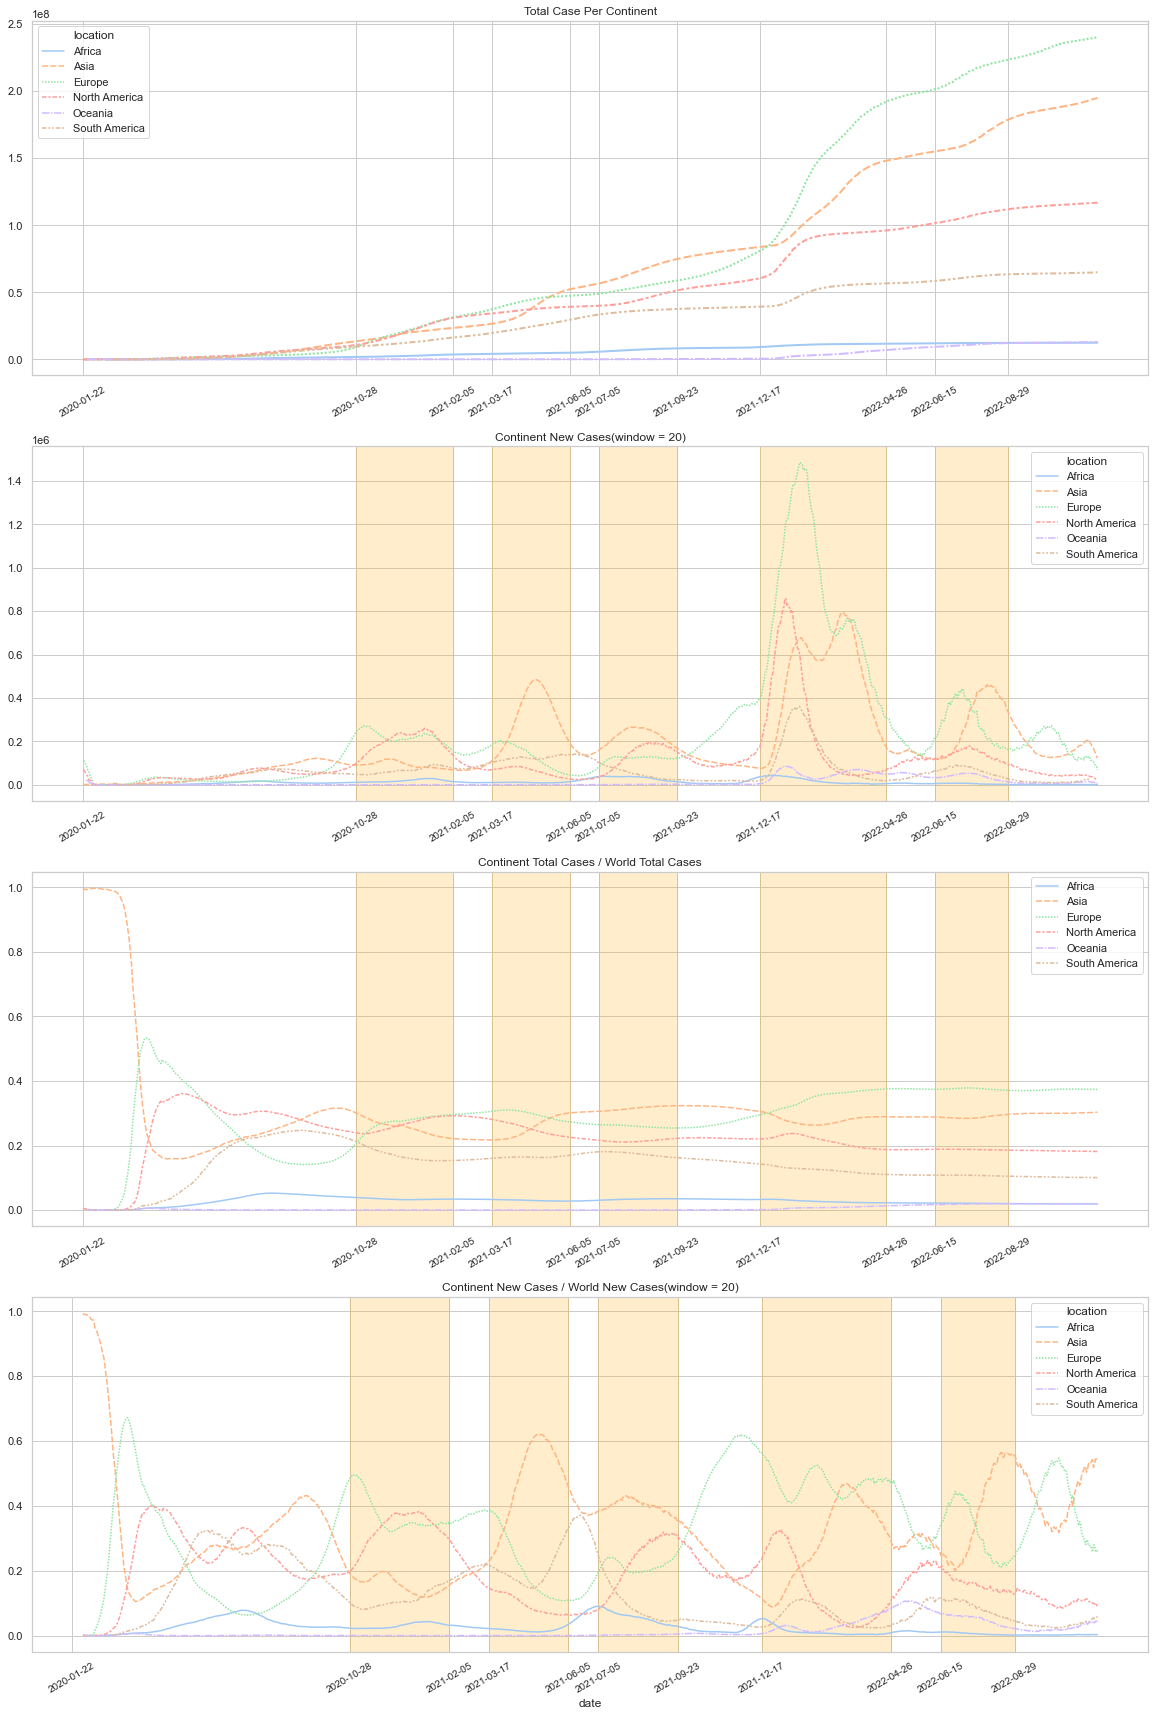

In [12]:
df_cnti = df\
    [df.location.apply(lambda x:x in['North America','South America','Asia','Europe','Oceania','Africa'])]\
    [['date','total_cases','location']]\
    .set_index(['location','date'])['total_cases']\
    .unstack(level = 0)


# continent new case:
df_cnti_new = df\
    [df.location.apply(lambda x:x in['North America','South America','Asia','Europe','Oceania','Africa'])]\
    [['date','new_cases','location']]\
    .set_index(['location','date'])['new_cases']\
    .rolling(window = 20,center = True).mean()\
    .unstack(level = 0)
    
df_cnti_new_unrolling = df\
    [df.location.apply(lambda x:x in['North America','South America','Asia','Europe','Oceania','Africa'])]\
    [['date','new_cases','location']]\
    .set_index(['location','date'])['new_cases']\
    .unstack(level = 0)


# continent percentage
df_cnti_ratio = df_cnti[:]
for col in df_cnti_ratio.columns:
    df_temp = df_cnti_ratio[col]/df_total_case.iloc[:,0]
    df_cnti_ratio[col] = df_temp

# continent percentage new cases
df_cnti_ratio_new = df_cnti_new_unrolling[:]
for col in df_cnti_ratio_new.columns:
    df_temp = df_cnti_ratio_new[col]/df_new_cases
    df_cnti_ratio_new[col] = df_temp.rolling(window = 20,center = True).mean()
    
        
plt.figure(figsize = (20,30))
ax1 = plt.subplot(411)
sns.lineplot(df_cnti,linewidth=2)
plt.xticks(date_for_newcase,fontsize = 10, rotation = 30)
plt.xlabel('')
plt.title('Total Case Per Continent')

ax2 = plt.subplot(412)
sns.lineplot(df_cnti_new)
plt.xticks(date_for_newcase,fontsize = 10, rotation = 30)
plt.title('Continent New Cases(window = 20)')
plt.xlabel('')
for period in periods:
    plt.axvspan(period[0],period[1],color = 'orange',alpha = 0.2)


ax3 = plt.subplot(413)
sns.lineplot(df_cnti_ratio)
plt.xticks(date_for_newcase,fontsize = 10, rotation = 30)
plt.title('Continent Total Cases / World Total Cases')
plt.xlabel('')
plt.legend(loc = 1)
for period in periods:
    plt.axvspan(period[0],period[1],color = 'orange',alpha = 0.2)

ax4 = plt.subplot(414)
sns.lineplot(df_cnti_ratio_new)
plt.xticks(date_for_newcase,fontsize = 10, rotation = 30)
plt.title('Continent New Cases / World New Cases(window = 20)')
for period in periods:
    plt.axvspan(period[0],period[1],color = 'orange',alpha = 0.2)

plt.show()

Chart above shows total cases and new cases "continentwise". The percentage of continent among total cases was also calculated.

In [21]:
df_nation_total= df[:].groupby(by = ['location','date'])\
    .sum().total_cases[:-1]\
    .unstack(level = 0)

df_nation_total = df_nation_total.drop(['World',
                                        'High income',
                                        'Upper middle income',
                                        'Lower middle income',
                                        'Low income',
                                        'Europe',
                                        'Asia',
                                        'European Union',
                                        'North America',
                                        'South America'],axis = 1)

df_nation_new = df[:].groupby(by = ['location','date'])\
    .sum().new_cases[:-1]\
    .unstack(level = 0)\
    .iloc[21:-1,:]

df_nation_new = df_nation_new.drop(['World',
                                        'High income',
                                        'Upper middle income',
                                        'Lower middle income',
                                        'Low income',
                                        'Europe',
                                        'Asia',
                                        'European Union',
                                        'North America',
                                        'South America'],axis = 1)

i = 1
for period in periods:
    
    print("Period {}: {} to {}\n".format(i,df_total_case.index[period[0]],df_total_case.index[period[1]]))
    df_temp = df_nation_new.iloc[period[0]:period[1]].sum().sort_values(ascending = False)[:10]
    s = df_new_cases.reset_index().new_cases\
        .iloc[period[0]:period[1]].sum()
    
    print(df_temp.apply(lambda x:int(x)))
    print('\n')
    print((df_temp/s).apply(lambda x:round(x,3)))
    print('\n'+'-'*50)
    
    i += 1

Period 1: 2020-10-28 to 2021-02-05

location
United States     18040099
Brazil             3959621
United Kingdom     2974884
India              2812269
Russia             2337688
France             2099203
Italy              2032668
Africa             1891250
Germany            1802726
Spain              1796687
dtype: int64


location
United States     0.299
Brazil            0.066
United Kingdom    0.049
India             0.047
Russia            0.039
France            0.035
Italy             0.034
Africa            0.031
Germany           0.030
Spain             0.030
dtype: float64

--------------------------------------------------
Period 2: 2021-03-17 to 2021-06-05

location
India            17256145
Brazil            5231494
United States     3797819
Turkey            2364826
France            1942462
Argentina         1705276
Colombia          1208446
Iran              1190996
Germany           1114304
Italy              968949
dtype: int64


location
India            0.330
Br

## What is correlated with Excess Mortality

In [15]:
df_exc = pd.read_csv('./data/excess_mortality.csv')

df_exc['time'] =  pd.to_datetime(df_exc.date).apply(lambda x:str(x.year)+'/'+str(x.month))

exc_nations = df_exc.location.unique()
dic = {}
for nation in exc_nations:
    dic[nation] = max(df_exc[df_exc.location == nation].cum_p_proj_all_ages)

# create df_exc_stat 
df_exc_stat = pd.DataFrame(dic,range(1)).T.reset_index()
df_exc_stat.columns = ['location','exc']

# merge stringecy
df_temp = df[df.location.apply(lambda x:x in exc_nations)][['location','stringency_index']]
df_exc_stat = pd.merge(df_exc_stat,df_temp.groupby('location').mean(),on = 'location')

# merge beds
df_temp = df[df.location.apply(lambda x:x in exc_nations)][['location','hospital_beds_per_thousand']]
df_exc_stat = pd.merge(df_exc_stat,df_temp.groupby('location').mean(),on = 'location')

# merge human development index
df_temp = df[df.location.apply(lambda x:x in exc_nations)][['location','human_development_index']]
df_exc_stat = pd.merge(df_exc_stat,df_temp.groupby('location').mean(),on = 'location')

r_result = stats.pearsonr(df_exc_stat.exc.fillna(df_exc_stat.exc.mean()).values,
               df_exc_stat.stringency_index.fillna(df_exc_stat.stringency_index.mean()).values)
print("The r for \033[1;34mexcess mortality\033[0m and \033[1;34mstringency_index\033[0m is {}, with p value = {}, which is not significant"\
      .format(round(r_result[0],2),round(r_result[1],3)))

r_result = stats.pearsonr(df_exc_stat.exc.fillna(df_exc_stat.exc.mean()).values,
         df_exc_stat.hospital_beds_per_thousand.fillna(df_exc_stat.hospital_beds_per_thousand.mean()).values)
print("The r for \033[1;34mexcess mortality\033[0m and \033[1;34mhospital bed per thousand\033[0m is {}, with p value = {}, which is significant"\
      .format(round(r_result[0],2),round(r_result[1],3)))

r_result = stats.pearsonr(df_exc_stat.exc.fillna(df_exc_stat.exc.mean()).values,
               df_exc_stat.human_development_index.fillna(df_exc_stat.human_development_index.mean()).values)
print("The r for \033[1;34mexcess mortality\033[0m and \033[1;34mhuman development index\033[0m is {},with p value < .001, which is significant"\
      .format(round(r_result[0],2)))

The r for excess mortality and stringency_index is 0.14, with p value = 0.136, which is not significant
The r for excess mortality and hospital bed per thousand is -0.24, with p value = 0.008, which is significant
The r for excess mortality and human development index is -0.38,with p value < .001, which is significant


## Bar Chart Race

In [ ]:
df_nation_total= df[:].groupby(by = ['location','date'])\
    .sum().total_cases[:-1]\
    .unstack(level = 0)\
    .fillna(0)

df_nation_total = df_nation_total.drop(['World',
                                        'High income',
                                        'Upper middle income',
                                        'Lower middle income',
                                        'Low income',
                                        'Europe',
                                        'Asia',
                                        'European Union',
                                        'North America',
                                        'South America'],axis = 1)

bcr.bar_chart_race(
    df = df_nation_total,
    filename = 'test.mp4',
    orientation = 'h',
    n_bars=10,
    title='COVID-19 Deaths by Country',
    perpendicular_bar_func='mean',
    cmap='antique'
    )

It will create a video presenting dynamic bar plot. The video is included in .zip file